In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [2]:
data = pd.read_csv("sample_data/flight.csv")
X = data.loc[:,('Age', 'Class', 'Inflight wifi service', 'Food and drink', 'Seat comfort', 'Inflight entertainment', 'Leg room service', 'Inflight service')]
X = pd.get_dummies(X, prefix='Class', columns=['Class'])
y = data['satisfaction']
print("Label kelas : ", np.unique(y))

Label kelas :  ['neutral or dissatisfied' 'satisfied']


In [3]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
print(X[0:5,:])

[[ 0.81788702  1.70385282 -0.1617392  -0.34030327  1.22713822  1.25097391
   1.14406253 -0.9627357   1.11636981 -0.28227491]
 [-0.23923776 -1.29159781  1.34034786  1.1747739   0.47990687  0.49273006
   0.29707737  1.03870668 -0.89576051 -0.28227491]
 [-1.29636255 -0.54273516 -0.91278273 -1.09784186 -1.01455585 -1.78200148
  -1.39689295 -0.9627357   1.11636981 -0.28227491]
 [ 0.28932463 -2.04046047 -0.1617392   0.41723532 -1.76178721 -1.78200148
  -2.2438781   1.03870668 -0.89576051 -0.28227491]
 [ 0.61967612 -0.54273516  0.58930433 -1.09784186 -1.01455585 -1.02375763
  -1.39689295 -0.9627357   1.11636981 -0.28227491]]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("X Training:", X_train[0:5,:])
print("y Training:",y_train[0:5])

X Training: [[-0.83387045  0.95499016 -1.66382626 -1.85538044 -1.76178721 -1.78200148
  -1.39689295 -0.9627357   1.11636981 -0.28227491]
 [-0.63565956  0.2061275   0.58930433  0.41723532  0.47990687 -0.26551378
   0.29707737  1.03870668 -0.89576051 -0.28227491]
 [-0.43744866 -1.29159781  0.58930433 -0.34030327 -0.26732449 -1.78200148
  -0.54990779  1.03870668 -0.89576051 -0.28227491]
 [ 0.02504343  0.2061275   1.34034786  1.1747739   1.22713822 -0.26551378
   0.29707737 -0.9627357   1.11636981 -0.28227491]
 [-0.83387045 -0.54273516 -0.1617392  -0.34030327 -0.26732449 -1.78200148
  -0.54990779 -0.9627357   1.11636981 -0.28227491]]
y Training: 25666    neutral or dissatisfied
920                    satisfied
8073     neutral or dissatisfied
2214     neutral or dissatisfied
16129    neutral or dissatisfied
Name: satisfaction, dtype: object


In [5]:
from sklearn.svm import SVC
clf_svc = SVC(kernel='rbf', C=0.1, gamma=1, random_state=0)
clf_svc.fit(X_train, y_train)

SVC(C=0.1, gamma=1, random_state=0)

In [6]:
# print("Koefisien model : ", clf_svc.coef_)
print("Bias model : ", clf_svc.intercept_)
print("Indeks Support Vector : ", clf_svc.support_)
print("Support vector : ", clf_svc.support_vectors_)
print("Jumlah support vector: ",clf_svc.n_support_)
print("Nilai alpha : ", np.abs(clf_svc.dual_coef_))

Bias model :  [-0.55875773]
Indeks Support Vector :  [    0     2     5 ... 18171 18177 18181]
Support vector :  [[-0.83387045  0.95499016 -1.66382626 ... -0.9627357   1.11636981
  -0.28227491]
 [-0.43744866 -1.29159781  0.58930433 ...  1.03870668 -0.89576051
  -0.28227491]
 [ 2.0071524   0.2061275   1.34034786 ... -0.9627357  -0.89576051
   3.54264577]
 ...
 [-0.37137836  0.95499016 -0.91278273 ...  1.03870668 -0.89576051
  -0.28227491]
 [-1.29636255 -2.04046047  0.58930433 ... -0.9627357   1.11636981
  -0.28227491]
 [ 0.75181672  0.95499016 -0.91278273 ... -0.9627357   1.11636981
  -0.28227491]]
Jumlah support vector:  [5105 4655]
Nilai alpha :  [[0.1 0.1 0.1 ... 0.1 0.1 0.1]]


In [7]:
y_prediksi = clf_svc.predict(X_test)
print(y_prediksi)

['neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' ... 'satisfied' 'neutral or dissatisfied'
 'satisfied']


Akurasi : 86.12857692801232 %


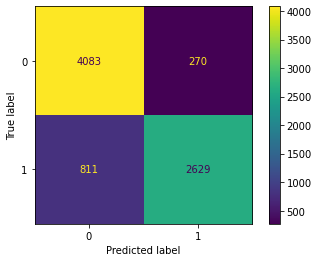

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
cm = confusion_matrix(y_test, y_prediksi)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()
akurasi = accuracy_score(y_test, y_prediksi)*100
print("Akurasi : {} %".format(akurasi))